In [1]:
%conda install -c conda-forge shap

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - nvidia
 - pytorch
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 24.7.1
    latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/python3

  added / updated specs:
    - shap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    shap-0.46.0                |cpu_py310h377a755_1         1.2 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  cloudpickle        conda-forge/noarch::cloudpickle-3.1.0-pyhd8ed1ab_1 
  packaging          conda-forge/noarch::packaging-24.2-pyhff2d567_1 

The followin

In [3]:
conda update -n base -c conda-forge conda

Channels:
 - conda-forge
 - nvidia
 - pytorch
Platform: linux-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import shap
X,y=shap.datasets.adult()
X_display, y_display=shap.datasets.adult(display=True)
feature_names=list(X.columns)
feature_names

['Age',
 'Workclass',
 'Education-Num',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581646,3.868892,10.080679,2.611836,6.572740,2.494518,3.665858,0.669205,1077.648804,87.303833,40.437454,36.718866
std,13.640442,1.455960,2.572562,1.506222,4.228857,1.758232,0.848806,0.470506,7385.911621,403.014771,12.347933,7.823782
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,10.000000,2.000000,7.000000,3.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,4.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


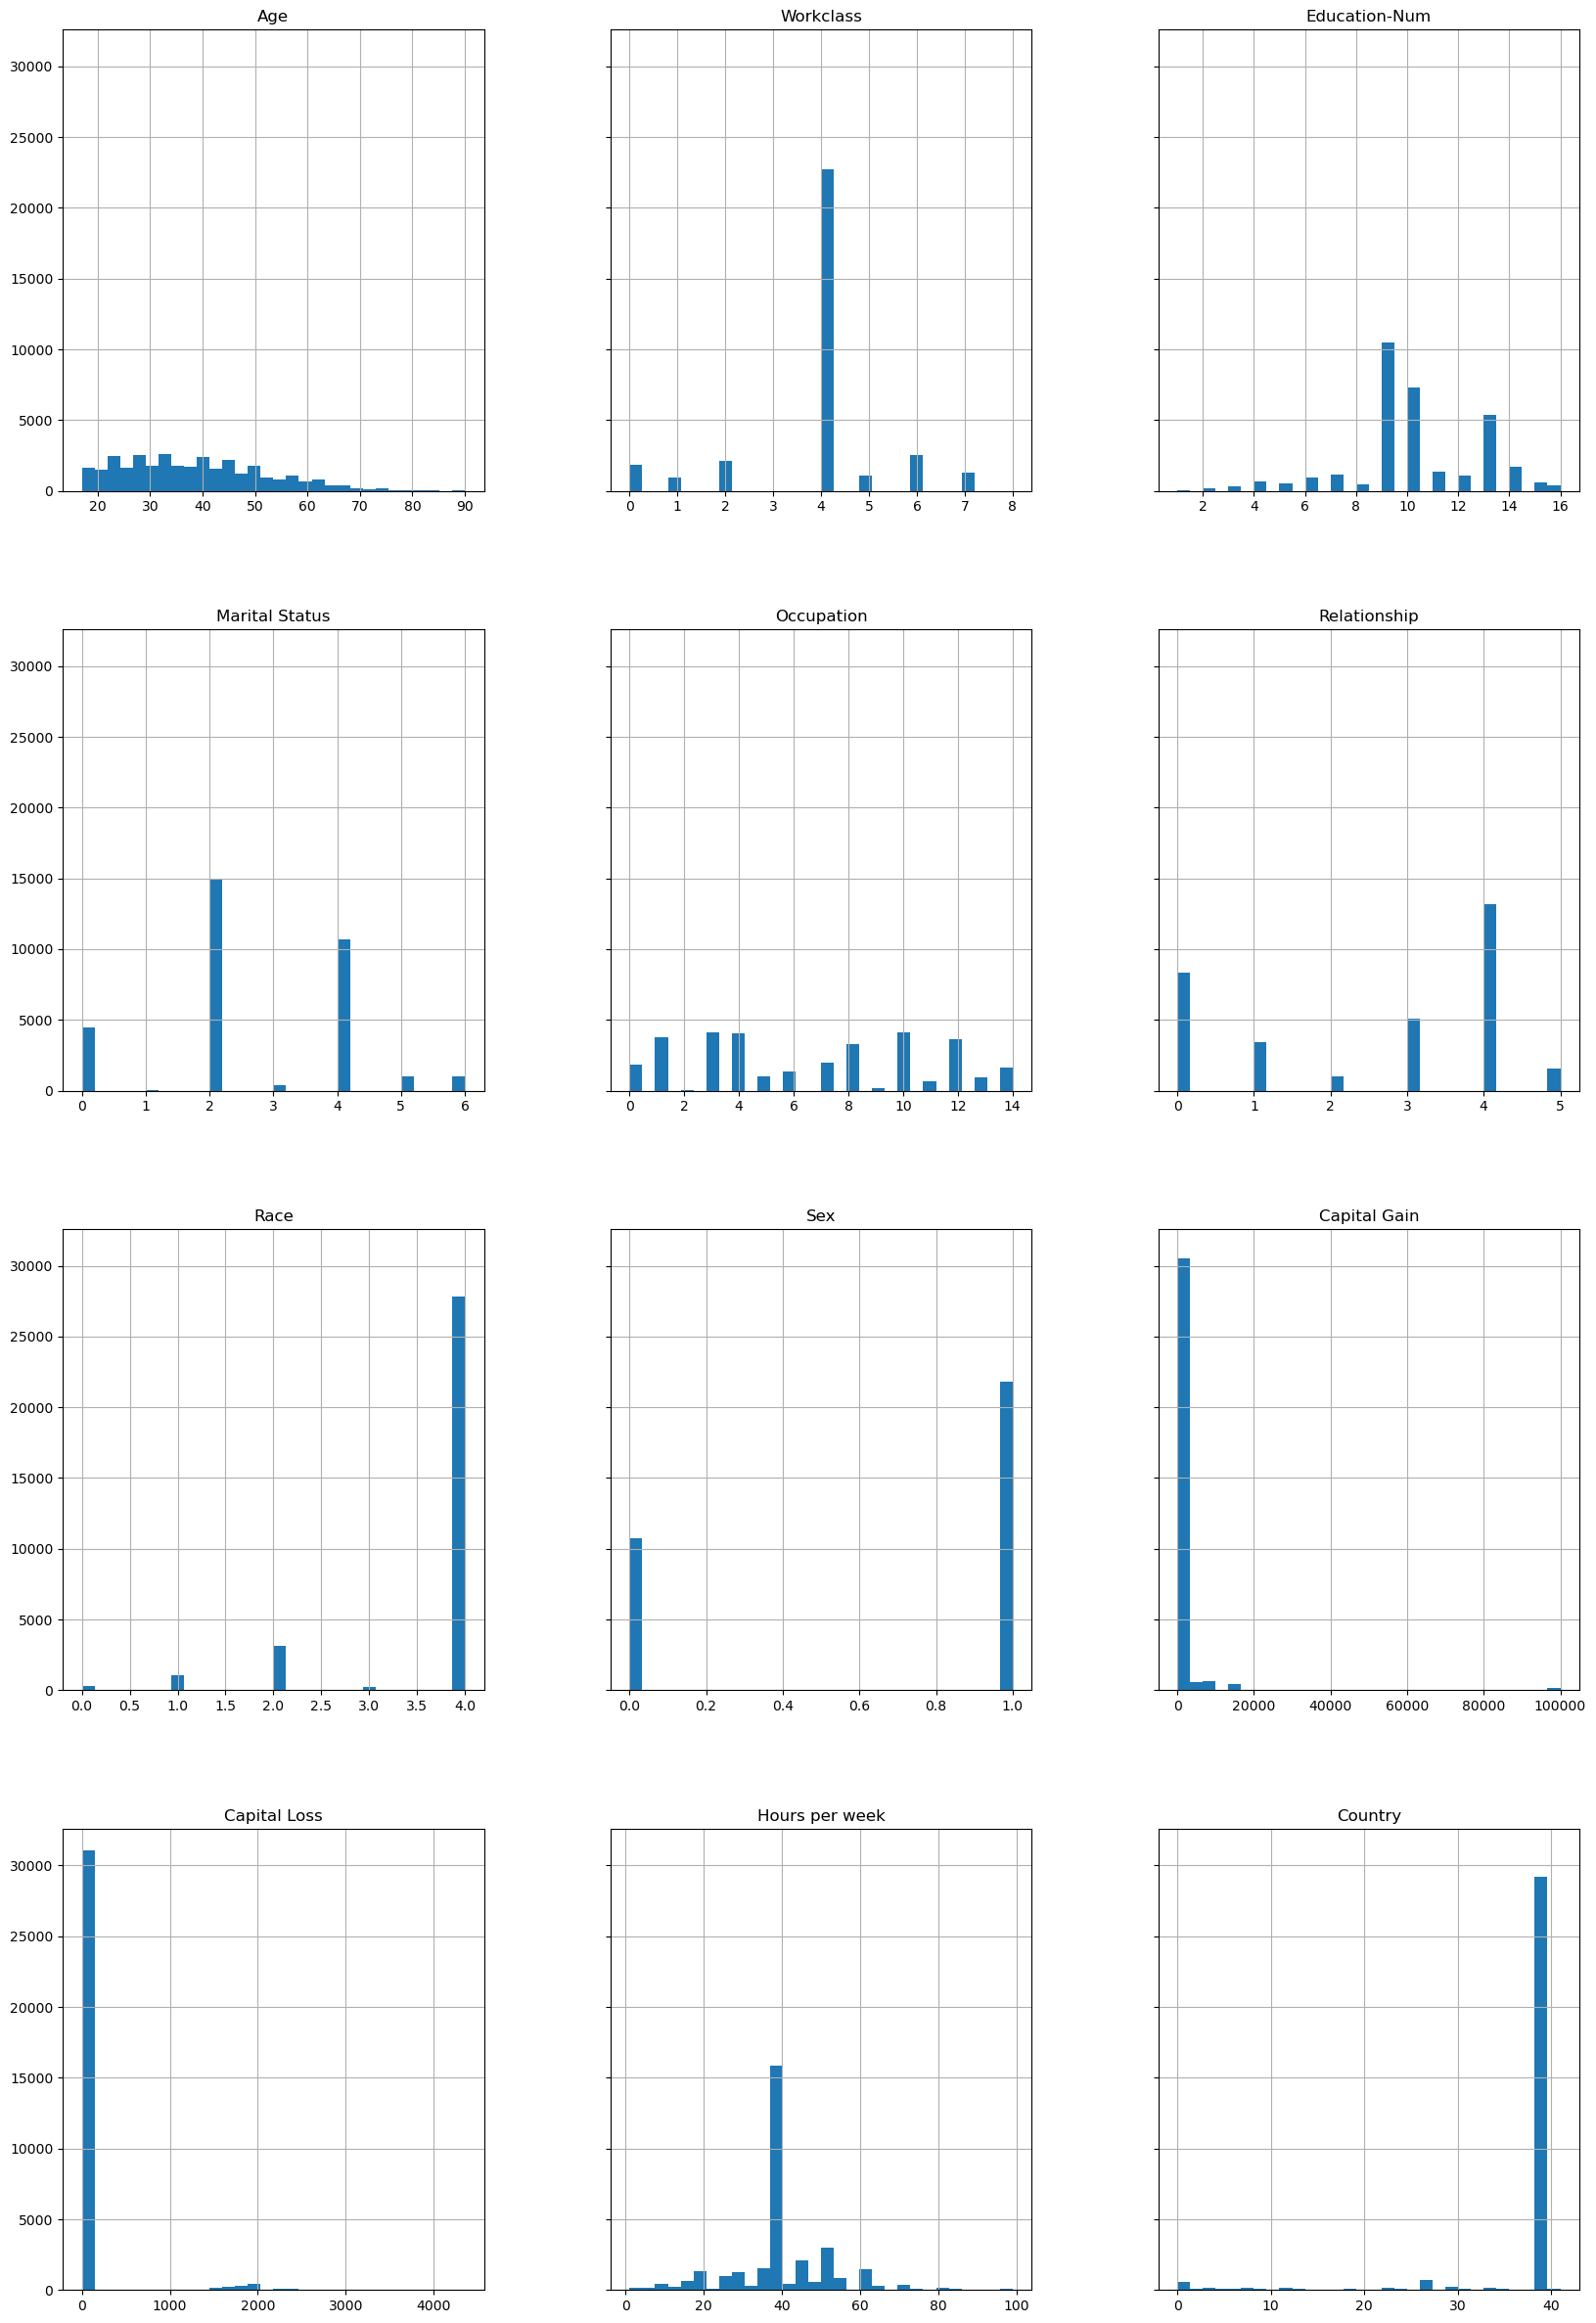

In [3]:
display(X.describe())
hist=X.hist(bins=30, sharey=True, figsize=(20,30))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
X_train_display=X_display.loc[X_train.index]

In [5]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=1)
X_train_display=X_display.loc[X_train.index]
X_val_display=X_display.loc[X_val.index]

In [6]:
import pandas as pd
train=pd.concat([pd.Series(y_train,index=X_train.index,
                           name='Income>Sex',dtype=int),X_train],axis=1)
validation=pd.concat([pd.Series(y_val,index=X_val.index,
                                name='Income>Sex',dtype=int),X_val],axis=1)
test=pd.concat([pd.Series(y_test,index=X_test.index,
                         name='Income>Sex',dtype=int),X_test],axis=1)

In [7]:
train

,Income>Sex,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
10911,1,47.0,4,9.0,2,3,4,4,1,0.0,0.0,40.0,39
17852,0,31.0,4,13.0,2,7,4,3,1,0.0,0.0,36.0,26
29165,1,32.0,4,10.0,2,13,5,4,0,0.0,0.0,32.0,39
30287,0,58.0,4,9.0,2,3,4,2,1,0.0,0.0,40.0,39
24019,0,17.0,4,6.0,4,6,3,4,1,0.0,0.0,20.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21168,0,43.0,4,8.0,2,14,4,4,1,0.0,0.0,40.0,39
6452,0,26.0,4,9.0,4,7,0,4,1,0.0,0.0,52.0,39
31352,0,32.0,7,14.0,2,10,4,4,1,0.0,0.0,50.0,39
6575,0,45.0,4,9.0,4,6,0,4,1,0.0,0.0,40.0,39


In [8]:
validation

,Income>Sex,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
16530,0,25.0,4,4.0,2,6,4,4,1,0.0,0.0,40.0,26
26723,0,41.0,6,9.0,2,5,5,4,0,0.0,0.0,40.0,39
3338,0,79.0,0,9.0,6,0,0,2,0,0.0,0.0,30.0,39
19367,1,43.0,2,15.0,2,10,4,4,1,15024.0,0.0,45.0,39
30274,0,51.0,5,9.0,4,12,2,4,1,0.0,0.0,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,0,46.0,7,9.0,2,13,4,4,1,0.0,0.0,40.0,39
5937,1,71.0,4,10.0,6,12,0,4,1,0.0,0.0,35.0,39
11034,0,36.0,4,9.0,5,14,2,4,1,0.0,0.0,60.0,26
2819,0,31.0,4,9.0,4,8,0,4,0,0.0,0.0,40.0,39


In [9]:
test

,Income>Sex,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
9646,0,62.0,6,4.0,6,8,0,4,0,0.0,0.0,66.0,39
709,0,18.0,4,7.0,4,8,2,4,1,0.0,0.0,25.0,39
7385,1,25.0,4,13.0,4,5,3,4,1,27828.0,0.0,50.0,39
16671,0,33.0,4,9.0,2,10,4,4,1,0.0,0.0,40.0,39
21932,0,36.0,4,7.0,4,7,1,4,0,0.0,0.0,40.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5889,1,39.0,4,13.0,2,10,5,4,0,0.0,0.0,20.0,39
25723,0,17.0,4,6.0,4,12,3,4,0,0.0,0.0,20.0,39
29514,0,35.0,4,9.0,4,14,3,4,1,0.0,0.0,40.0,39
1600,0,30.0,4,7.0,2,3,4,4,1,0.0,0.0,45.0,39


In [10]:
train.to_csv('train.csv',index=False, header=False)
validation.to_csv('validation.csv',index=False,header=False)

In [11]:
import sagemaker, boto3, os
bucket=sagemaker.Session().default_bucket()
prefix="demo.sagemaker.xgboost.adult.income.prediction"
boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix, 'data/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix, 'data/validation.csv')).upload_file('validation.csv')

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [12]:
! aws s3 ls {bucket}/{prefix}/data --recursive

2024-11-22 14:28:35     786285 demo.sagemaker.xgboost.adult.income.prediction/data/train.csv
2024-11-22 14:28:36     262122 demo.sagemaker.xgboost.adult.income.prediction/data/validation.csv


In [13]:
import sagemaker
region=sagemaker.Session().boto_region_name
print("AWS Region: {}".format(region))
role=sagemaker.get_execution_role()
print("RoleArn:{}".format(role))

AWS Region: us-east-1
RoleArn:arn:aws:iam::726990234305:role/service-role/AmazonSageMaker-ExecutionRole-20241122T142403


In [15]:
sagemaker.__version__

'2.233.0'

In [16]:
from sagemaker.debugger import Rule, rule_configs
from sagemaker.session import TrainingInput

s3_output_location = 's3://{}/{}/{}'.format(bucket, prefix, 'xgboost_model')
container = sagemaker.image_uris.retrieve("xgboost", region, "1.2-1")
print(container)

xgb_model = sagemaker.estimator.Estimator(
    image_uri=container,  # Updated from image_url
    role=role,  # Corrected positional argument to keyword argument
    instance_count=1,
    instance_type='ml.m4.xlarge',  # Corrected instance type
    volume_size=5,
    output_path=s3_output_location,
    sagemaker_session=sagemaker.Session(),  # Corrected session syntax
    rules=[Rule.sagemaker(rule_configs.create_xgboost_report())]
)

683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-xgboost:1.2-1


In [17]:
xgb_model.set_hyperparameters(
    max_depth=5,
    eta=0.2,
    gamma=4,
    min_child_weight=6,
    subsample=0.7,
    objective="binary:logistic",
    num_round=1000
)

In [18]:
from sagemaker.session import TrainingInput

train_input = TrainingInput(
    "s3://{}/{}/{}".format(bucket, prefix, "data/train.csv"), content_type="csv"
)

validation_input = TrainingInput(
    "s3://{}/{}/{}".format(bucket, prefix, "data/validation.csv"), content_type="csv"
)

In [19]:
xgb_model.fit({"train":train_input, "validation":validation_input}, wait=True)

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2024-11-22-14-30-02-021


2024-11-22 14:30:07 Starting - Starting the training job...
2024-11-22 14:30:29 Starting - Preparing the instances for trainingCreateXgboostReport: InProgress
......
2024-11-22 14:31:30 Downloading - Downloading input data...
2024-11-22 14:31:50 Downloading - Downloading the training image......
2024-11-22 14:32:50 Training - Training image download completed. Training in progress.[2024-11-22 14:32:57.718 ip-10-0-187-139.ec2.internal:7 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV 

In [20]:
rule_output_path= xgb_model.output_path + "/" + xgb_model.latest_training_job.name+ "/rule.output"
! aws s3 ls {rule_output_path} --recursive

In [21]:
! aws s3 cp {rule_output_path} ./ --recursive

In [54]:
from IPython.display import FileLink, FileLinks
display("Click link below to view XGBoost Training report", FileLink("CreateXgboostReport/xgboost_report.html"))

'Click link below to view XGBoost Training report'

/home/ec2-user/SageMaker/CreateXgboostReport/xgboost_report.html

In [56]:
from IPython.display import FileLink, display

# Retrieve the profiler report name
profiler_report_names = [
    rule["RuleConfigurationName"]
    for rule in xgb_model.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
]

# Check if any profiler rules were found
if profiler_report_names:
    profiler_report_name = profiler_report_names[0]  # Access the first profiler report name
    display(
        "Click link below to view the profiler report",
        FileLink(f"{profiler_report_name}/profiler-output/profiler-report.html")
    )
else:
    print("No profiler rules found or the profiler report is not yet available.")


No profiler rules found or the profiler report is not yet available.


In [57]:
xgb_model.model_data

's3://sagemaker-us-east-1-726990234305/demo.sagemaker.xgboost.adult.income.prediction/xgboost_model/sagemaker-xgboost-2024-11-22-14-30-02-021/output/model.tar.gz'

In [59]:
import sagemaker
from sagemaker.serializers import CSVSerializer

# Deploy with a valid instance type (e.g., 'ml.t2.medium')
xgb_predictor = xgb_model.deploy(
    initial_instance_count=1,
    instance_type='ml.t2.medium',  # Valid instance type for SageMaker
    serializer=CSVSerializer()
)


INFO:sagemaker:Creating model with name: sagemaker-xgboost-2024-11-22-15-21-07-401
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2024-11-22-15-21-07-401
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2024-11-22-15-21-07-401


----------!

In [60]:
xgb_predictor.endpoint_name

'sagemaker-xgboost-2024-11-22-15-21-07-401'

In [61]:
import numpy as np
def predict(data,rows=1000):
    split_array=np.array_split(data,int(data.shape[0]/float(rows)+1))
    predictions=''
    for array in split_array:
        predictions=','.join([predictions,xgb_predictor.predict(array).decode('utf-8')])
    return np.fromstring(predictions[1:],sep=',')

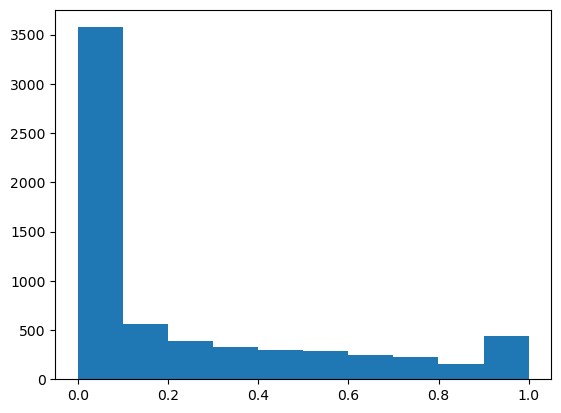

In [63]:
import matplotlib.pyplot as plt
predictions=predict(test.to_numpy()[:,1:])
plt.hist(predictions)
plt.show()

In [64]:
import sklearn
cutoff=0.5
print(sklearn.metrics.confusion_matrix(test.iloc[:,0],np.where(predictions>cutoff,1,0)))
print(sklearn.metrics.classification_report(test.iloc[:,0],np.where(predictions>cutoff,1,0)))


[[4670  356]
 [ 480 1007]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5026
           1       0.74      0.68      0.71      1487

    accuracy                           0.87      6513
   macro avg       0.82      0.80      0.81      6513
weighted avg       0.87      0.87      0.87      6513



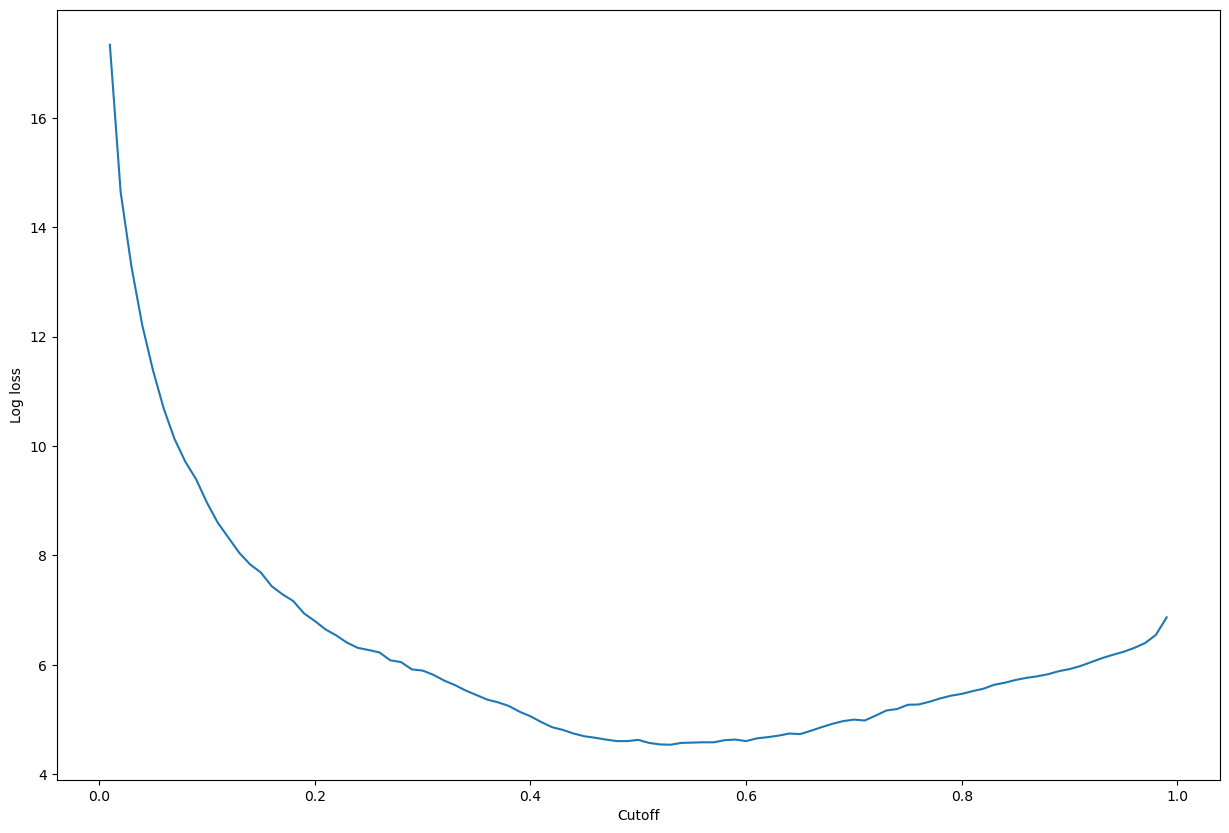

In [65]:
import matplotlib.pyplot as plt
cutoffs=np.arange(0.01,1,0.01)
log_loss=[]
for c in cutoffs:
    log_loss.append(
    sklearn.metrics.log_loss(test.iloc[:,0],np.where(predictions > c,1,0))
    )
plt.figure(figsize=(15,10))
plt.plot(cutoffs,log_loss)
plt.xlabel("Cutoff")
plt.ylabel("Log loss")
plt.show()
    

In [66]:
print(
    'Log loss is minimized at a cutoff of', cutoffs[np.argmin(log_loss)],
    ', and the log loss value at the minimum is', np.min(log_loss)
)

Log loss is minimized at a cutoff of 0.53 , and the log loss value at the minimum is 4.537969565342555
